In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scienceplots # Requires a local LaTeX instalation

plt.style.use('science')
plt.rcParams.update({
    "font.family": "lmodern",   # specify font family here
    "font.size":11})            # specify font size here

textwidth = 6.49733 # Length in inches. Obtained from the latex file.

In [3]:
path = 'Auxiliar_plots/'
path_figuras = 'Figuras/' + path

In [4]:
galaxies_part1 = pd.read_csv('Resultados/galaxies_part1.csv')
galaxies_part2 = pd.read_csv('Resultados/galaxies_part2.csv')
galaxies_part3 = pd.read_csv('Resultados/galaxies_part3.csv')

combined_part2 = galaxies_part2.loc[:, ['Halo mrank 1', 'Halo mrank 2', 'Halo mrank 3', 'Halo mrank 4',
                                        'Halo mrank 5', 'Halo mrank 6', 'Halo vrank 1', 'Halo vrank 2',
                                        'Halo vrank 3', 'Halo vrank 4', 'Halo vrank 5', 'Halo vrank 6',
                                        'Halo mrank 1 bin', 'Halo mrank 2 bin',
                                        'Halo mrank 3 bin', 'Halo mrank 4 bin', 'Halo mrank 5 bin',
                                        'Halo mrank 6 bin', 'Halo vrank 1 bin', 'Halo vrank 2 bin',
                                        'Halo vrank 3 bin', 'Halo vrank 4 bin', 'Halo vrank 5 bin',
                                        'Halo vrank 6 bin']]

combined_part3 = galaxies_part3.loc[:, ['Halo tmform 1', 'Halo tmform 2', 'Halo tmform 3', 'Halo tmform 4',
                                        'Halo tmform 5', 'Halo tvform 1', 'Halo tvform 2', 'Halo tvform 3', 
                                        'Halo tmform 1 bin', 'Halo tmform 2 bin',
                                        'Halo tmform 3 bin', 'Halo tmform 4 bin', 'Halo tmform 5 bin',
                                        'Halo tvform 1 bin', 'Halo tvform 2 bin', 'Halo tvform 3 bin']]

galaxies = pd.concat([galaxies_part1, combined_part2, combined_part3], axis=1)

galaxies_sample = galaxies[galaxies.loc[:, 'Stellar mass'] > 10.5].copy()

galaxies_sample_bin1 = galaxies_sample[galaxies_sample.loc[:, 'Stellar mass'] < 10.75].copy()
galaxies_sample_bin2 = galaxies_sample[galaxies_sample.loc[:, 'Stellar mass'] > 10.75].copy()

In [5]:
print('Median halo mass of first bin:',  np.round(np.log10(10**(galaxies_sample_bin1['Halo mass']).median()), 3))
print('Median halo mass of second bin:', np.round(np.log10(10**(galaxies_sample_bin2['Halo mass']).median()), 3))

Median halo mass of first bin: 12.404
Median halo mass of second bin: 12.939


In [6]:
mass_bins=[10.5, 10.75, 13.0]
counts_2, bins_2 = np.histogram(galaxies_sample['Stellar mass'], bins=mass_bins)
print(counts_2)

[13914 10519]


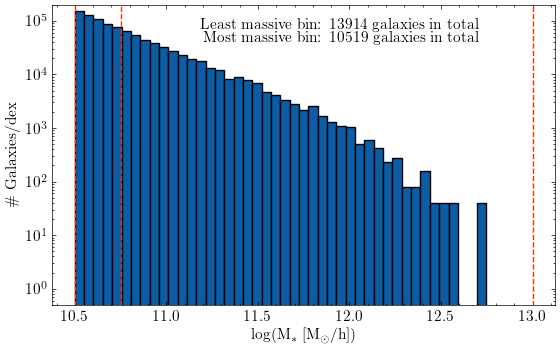

In [7]:
ploted_bins = np.array([10.5, 10.75, 13.0])
bins, bin_width=np.linspace(10.5, 13.0, retstep=True)
bin_width = bin_width/2

fig, ax = plt.subplots(1, 1, figsize=(textwidth, textwidth*0.6))
counts, bins = np.histogram(galaxies['Stellar mass'], bins=bins)
ax.hist(bins[0:-1]+bin_width, bins=bins, weights=(counts/bin_width), edgecolor='black')
for i in range(len(ploted_bins)):
    ax.vlines(ploted_bins[i], 0, 1e6, linestyle='--', color='C3')

ax.set_yscale('log')
ax.set_ylim([0.5, 2e5])
ax.set_xlabel(r'log(M$_{\ast}$ [M$_{\odot}$/h])')
ax.set_ylabel(r'\# Galaxies/dex')
ax.text(11.185, 0.7e5, f'Least massive bin: {counts_2[0]} galaxies in total')
ax.text(11.2, 0.4e5, f'Most massive bin: {counts_2[1]} galaxies in total')
plt.savefig(path_figuras+f'Analyzed_stellar_mass_bins.pdf', bbox_inches='tight')
plt.show()

In [10]:
renamed_sample = galaxies_sample.copy()
renamed_sample = renamed_sample.rename(columns={'Halo mass'    : r'M$_{h}$ [dex]', 
                                                'Stellar mass' : r'M$_{\ast}$ [dex]',
                                                'Halo spin' : r'$\lambda$',
                                                'Halo concentration' : 'C',
                                                'Halo mrank 1' : 'Mrank 1',
                                                'Halo mrank 2' : 'Mrank 2',
                                                'Halo mrank 3' : 'Mrank 3',
                                                'Halo mrank 4' : 'Mrank 4',
                                                'Halo mrank 5' : 'Mrank 5',
                                                'Halo mrank 6' : 'Mrank 6',
                                                'Halo vrank 1' : 'Vrank 1',
                                                'Halo vrank 2' : 'Vrank 2',
                                                'Halo vrank 3' : 'Vrank 3',
                                                'Halo vrank 4' : 'Vrank 4',
                                                'Halo vrank 5' : 'Vrank 5',
                                                'Halo vrank 6' : 'Vrank 6',
                                                'Halo tmform 1' : r'$t_{f, M, 1}$',
                                                'Halo tmform 2' : r'$t_{f, M, 2}$',
                                                'Halo tmform 3' : r'$t_{f, M, 3}$',
                                                'Halo tmform 4' : r'$t_{f, M, 4}$',
                                                'Halo tmform 5' : r'$t_{f, M, 5}$',
                                                'Halo tvform 1' : r'$t_{f, V, 1}$',
                                                'Halo tvform 2' : r'$t_{f, V, 2}$',
                                                'Halo tvform 3' : r'$t_{f, V, 3}$'})

renamed_sample_bin1 = galaxies_sample_bin1.copy()
renamed_sample_bin1 = renamed_sample_bin1.rename(columns={'Halo mass'    : r'log(M$_{h}$ [M$_{\odot}$/h])', 
                                                'Stellar mass' : r'log(M$_{\ast}$ [M$_{\odot}$/h])',
                                                'Halo spin' : r'$\lambda$',
                                                'Halo concentration' : 'C'})

renamed_sample_bin2 = galaxies_sample_bin2.copy()
renamed_sample_bin2 = renamed_sample_bin2.rename(columns={'Halo mass'    : r'log(M$_{h}$ [M$_{\odot}$/h])', 
                                                'Stellar mass' : r'log(M$_{\ast}$ [M$_{\odot}$/h])',
                                                'Halo spin' : r'$\lambda$',
                                                'Halo concentration' : 'C'})

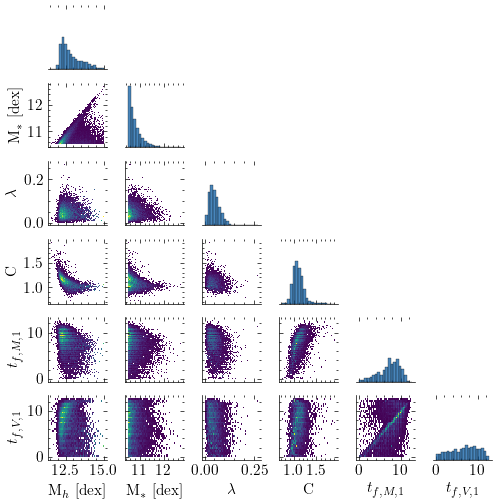

In [11]:
part_dict = {
    'part1' : [r'log(M$_{h}$ [M$_{\odot}$/h])', r'log(M$_{\ast}$ [M$_{\odot}$/h])', r'$\lambda$', 'C'],
    'part2' : [r'log(M$_{h}$ [M$_{\odot}$/h])', 'Mrank 4', 'Vrank 5'],
    'part3' : [r'log(M$_{h}$ [M$_{\odot}$/h])', r'$t_{f, M, 1}$', r'$t_{f, V, 1}$'],
    'all' : [r'M$_{h}$ [dex]', r'M$_{\ast}$ [dex]', r'$\lambda$', 'C', r'$t_{f, M, 1}$', r'$t_{f, V, 1}$']
}
scale=0.8

part = 'all'
variables = part_dict[part]

ax = sns.pairplot(renamed_sample,
             vars=variables,
             kind='hist',
             diag_kind='hist',
             height=scale*textwidth/len(variables),
             aspect=1,
             corner=True,
             plot_kws=dict(cmap='viridis'),
             diag_kws=dict(bins=20))

plt.savefig(path_figuras+'Corner_plot_seaborn_sample_all.pdf', bbox_inches='tight')
plt.show()